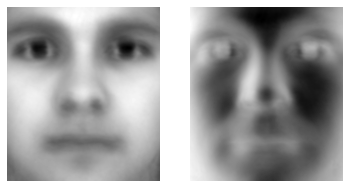

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io

#this Jupyter Notebook was created by the help of a tutorial by Steve Brunton and his Website http://databookuw.com

#get Path of Data Faces
current_path = os.getcwd()
mat_contents = scipy.io.loadmat(os.path.join(current_path,'DATA','allFaces.mat'))

#store matlab variables in local python variables
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

#using data of 36 persons for training and calculating the mean face
trainingFaces = faces[:,:np.sum(nfaces[:36])]
meanFace = np.mean(trainingFaces,axis=1) 

#subtract the mean face from the training data
X = trainingFaces - np.tile(meanFace,(trainingFaces.shape[1],1)).T

#calculate the SVD
U, S, VT = np.linalg.svd(X,full_matrices=0)

#plot, matrices need to be transposed to show them vertically, not horizontally
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(meanFace,(m,n)).T)
img_avg.set_cmap('gray')
plt.axis('off')

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()



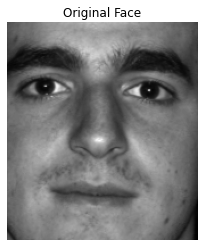

In [ ]:
## Now show eigenface reconstruction of image that was omitted from test set

inputFace = faces[:,np.sum(nfaces[:37])] # First face of person 38

#plot original Image
plt.imshow(np.reshape(inputFace,(m,n)).T)
plt.set_cmap('gray')
plt.title('Original Face')
plt.axis('off')
plt.show()

#subtract average face from input face
normalizedInputFace = inputFace - meanFace
 
r_list = [25, 50, 100, 200, 400, 800, 1600]

#recreate the input Image by the help of a varying number of Eigenfaces
for r in r_list:
    reconFace = meanFace + U[:,:r]  @ U[:,:r].T @ normalizedInputFace
    img = plt.imshow(np.reshape(reconFace,(m,n)).T)
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()